*This could not go before thanking the amazing Kaggle community. I have learned so much from you people, from beginners to grandmasters. Thank you all, and continue to do great work, inspiring more along the way*.

# HuBMAP: Hacking the Kidney

**Human BioMolecular Atlas Program (HuBMAP)** aims to be an open map of the human body at the cellular level, by working to develop a framework for the aforementioned mapping.

We aim to detect **FTU(Functional Tissue Units)** which are *3-D block of cells centered around a capillary*.

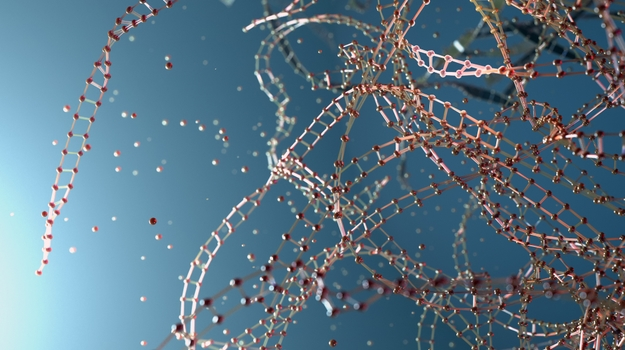

---------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Book I

This is my very first book in the EDA series of HuBMAP challenge. This one is centered around the exploration of the **HuBMAP-20-dataset_information.csv metadata file**.

---------------------------------------------------------------------------------------------------

Do upvote if you find it useful and let's begin!!!!!

Load important dependencies.

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [ ]:
dataframe = pd.DataFrame(pd.read_csv("../input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv"))

print("Shape of the dataframe = ", dataframe.shape)

In [ ]:
dataframe

Let's quickly look at the properties and types of this dataframe.

In [ ]:
dataframe.info()

It appeas we have some missing values centered around `weight`, `height` and `bmi` features. Rest all is fine.

# Dataset Images Shape Distribution

Let's analyze the shapes of the images encapsulated in our dataset. 

In [ ]:
px.scatter(dataframe, x = "width_pixels", y = "height_pixels")

One thing is clear. Images are real big. 
* Minimum size we have(*hover the mouse cursor on the bottommost leftmost point*) is 18k X 13k. 
* Maximum size we have is 49k X 34k.

Now, let's apply some filters on this scatter plot to analyze a bit more deeply.

## Filter I : By Sex

We overlay `sex` feature over the scatterplot, in order to segregate the male and female data points. 

In [ ]:
px.scatter(dataframe, x = "width_pixels", y = "height_pixels", color = "sex")

**Inference - *based on this data***: 

The **variance**/**standard deviation** in case of females is much larger than that in case of mails. 

-------------------------------------------------------------------
For the uninitiated, variance refers to spread of data around the central tendency(*which is the mean*). Standard deviation is just square root of variance.

-------------------------------------------------------------------

## Filter II : Age

Overlay the age filter.

In [ ]:
px.scatter(dataframe, x = "width_pixels", y = "height_pixels", size = "age", color = "sex")

In [ ]:
male_age_mean = np.mean(dataframe[dataframe["sex"] == "Male"]["age"].values)
male_age_variance = np.var(dataframe[dataframe["sex"] == "Male"]["age"].values)
print("################# Summary Statistic(Age) | Sex : Male #################")
print("Mean = ", male_age_mean)
print("Variance = ", male_age_variance)

female_age_mean = np.mean(dataframe[dataframe["sex"] == "Female"]["age"].values)
female_age_variance = np.var(dataframe[dataframe["sex"] == "Female"]["age"].values)
print("\n################# Summary Statistic(Age) | Sex : Female #################")
print("Mean = ", female_age_mean)
print("Variance = ", female_age_variance)


**Inference - *based on this data***

Now, this is all cool. We can observe that males have central tendency(mean) of age 51.0 with spread(variance) as 77.1428.
Whereas, females have the central tendency at 62.5, with variance as 114.58. 

We can see that variance is higher in case of females than those of males. Also, mean age of men < mean age of females, hence we have on average relatively older females than males in our dataset.

# Height and Weight Distribution : 

Let's have a look at height distibution of the metadata file. For that, the ideal way is to use a histogram/ Probability Density PLot - treat this as a normalized histogram, where every frequency is normalized by diving it with total values in the data set.

In statistics, a histogram is representation of the distribution of numerical data, where the data are binned and the count for each bin is represented. Treat bin as a group/class. For example, 10-20 weight class, 21-31 kg weight class and so on...We will use Plotly Express(which is a high level interface to Plotly) to plot the histogram.

In [ ]:
px.histogram(dataframe, x = "weight_kilograms", histnorm = "probability density", opacity = 0.6,
             title = "Probability Density Plot - WEIGHT")

In [ ]:
px.histogram(dataframe, x = "height_centimeters", histnorm = "probability density", opacity = 0.6,
             title = "Probability Density Plot - HEIGHT", color_discrete_sequence = ['indianred'])

## Apply filters

Let's analyze the height and weight distribution by overlaying additional filters on them.

## Filter I : Sex

In [ ]:
male_dataframe = dataframe[dataframe["sex"] == "Male"]["weight_kilograms"]
px.histogram(male_dataframe, x = "weight_kilograms", histnorm = "probability density", opacity = 0.6,
             title = "Probability Density Plot - WEIGHT ( MALE )", color_discrete_sequence = ['cyan'])

In [ ]:
female_dataframe = dataframe[dataframe["sex"] == "Female"]["weight_kilograms"]
px.histogram(female_dataframe, x = "weight_kilograms", histnorm = "probability density", opacity = 0.6,
             title = "Probability Density Plot - WEIGHT ( FEMALE )", color_discrete_sequence = ['magenta'])

We can study them separately, or we can overlay them for side by side comparison, as shown below.

In [ ]:
px.histogram(dataframe, x = "weight_kilograms", histnorm = "probability density", opacity = 0.6,
             title = "Probability Density Plot - WEIGHT ( MALE V FEMALE )", color = "sex")

Plot heights in a similar fashion.

In [ ]:
px.histogram(dataframe, x = "height_centimeters", histnorm = "probability density", opacity = 0.6,
             title = "Probability Density Plot - HEIGHT ( MALE V FEMALE )", color = "sex")

**Inference - *Based on this data***

* The overall `weight` distibution peaks at 60-79kg class [range = [40cm, 140cm]], wheareas the `height` one peaks at `160-169cm` [range = [150cm, 200cm]]. 

---------------------------------------------------------------------------------------
`weight distribution | MALES V FEMALES` : 

* For females, a major chunk is centered around `40kg - 59.9kg`, whereas for males it is `60kg -79.9kg`.
* Both distibutions resembles uniformity to a good extent, **however female height distribution data is relatively more uniform than males**.
----------------------------------------------------------------------------------------
`height distribution | MALES V FEMALES` : 
* Majority chunk of both males and females is centered around`160cm - 169cm`. 
* We still have a considerable fraction of relatively taller males, that is where height > 180cm. We don't have any females in that height zone.

# Body Mass Index(BMI)

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. *For most adults, an ideal BMI is in the 18.5 to 24.9 range.*

In this segment, we will explore the distibution of Body Mass Index(BMI) of all the patients we have in the dataset.

In [ ]:
bmi_stats = dataframe["bmi_kg/m^2"].value_counts().reset_index()
bmi_stats.head(2)

Let's make the columns a bit more friendly.

In [ ]:
bmi_stats.columns = ["bmi", "count"]
bmi_stats.head(2)

That seems more like it. Now, we will analyze it all visually.

In [ ]:
fig = px.pie(bmi_stats, values = "count", names = "bmi", title = "BMI Analysis", 
             color_discrete_sequence = px.colors.sequential.RdBu, hole = 0.3)
fig.update_traces(textposition = "inside")

## Overlay Filters : 

## Filter I : S E X

In [ ]:
male_dataframe = dataframe[dataframe["sex"] == "Male"]
female_dataframe = dataframe[dataframe["sex"] == "Female"]

bmi_stats_male = male_dataframe["bmi_kg/m^2"].value_counts().reset_index()
bmi_stats_male.columns = ["bmi", "count"]
bmi_stats_female = female_dataframe["bmi_kg/m^2"].value_counts().reset_index()
bmi_stats_female.columns = ["bmi", "count"]

In [ ]:
fig = px.pie(bmi_stats_male, values = "count", names = "bmi", title = "BMI Analysis - MALE", 
             color_discrete_sequence = px.colors.sequential.ice, hole = 0.3)
fig.update_traces(textposition = "inside")

In [ ]:
fig = px.pie(bmi_stats_female, values = "count", names = "bmi", title = "BMI Analysis - FEMALE", 
             color_discrete_sequence = px.colors.sequential.Sunset, hole = 0.3)
fig.update_traces(textposition = "inside")

**Inference - *Based on this data***

* 50.1% of BMI count is equally shared (16.7% each) by people having BMI - `22, 23, 26.5`. 
* Rest 49.9% is distibuted equally again(8.33% each) among six BMI value counts.

----------------------------------------------------------------------------------------------
`BMI Analysis - MALES`
* BMI **22 & 26.5** are dominant accounting roughly 52% in the overall male distribution.

------------------------------------------------------------------------------------------------
`BMI Analysis - FEMALES`
* BMI **23** is dominant one in females, accountig roughly 40% of all females in the metadata file.

# Male VS Female Count

Let's quickly have a look at the overall male vs female count in our dataset.

In [ ]:
sex_stats = dataframe["sex"].value_counts().reset_index()
sex_stats.columns = ["sex", "count"]
sex_stats

In [ ]:
px.bar(sex_stats, x = "sex", y = "count", color = "count", title = "Male V Female COUNTS")

**Inference - *Based on this data provided***

It's almost an equal distribution, that is a nearly balanced sample was taken from the population.

# Race

In [ ]:
dataframe["race"].unique()

So, we have two races in this sample. So, let's see that distibution as well.

In [ ]:
all_race_entries = dataframe["race"].values
white, b_a_american = 0, 0
for race in all_race_entries : 
    if race == "White" : 
        white = white + 1
    else:
        b_a_american = b_a_american + 1

print("Race = WHITE || Number of such folks = ", white)
print("Race = Black or African Americans || Number of such folks = ", b_a_american)

We don't always need fancy charts! Sometimes, a simple print( ) statement is enough. :-)

The three subsections down below are inspired from : **https://www.kaggle.com/kool777/hubmap-extensive-eda**

## Filter Overlay - Image Resolution Compared With Race

In [ ]:
plt.figure(figsize = (12, 8))
plt.title("Image Resolution V Race", fontsize = 18)
plt.rc('font', weight = "bold")
sns.set_style("whitegrid")
fig = sns.scatterplot(dataframe["width_pixels"], dataframe["height_pixels"], hue = dataframe["race"])
plt.xlabel("Width of the Image", fontsize = 16)
plt.ylabel("Height of the Image", fontsize = 16)
plt.grid(True)
plt.legend()

## Filter Overlay - Gender superimposed on the previous plot.

In [ ]:
plt.figure(figsize = (12, 8))
plt.title("Image Resolution V Race (GENDER SUPERIMPOSED)", fontsize = 18)
plt.rc('font', weight = "bold")
sns.set_style("whitegrid")
fig = sns.scatterplot(dataframe["width_pixels"], dataframe["height_pixels"], hue = dataframe["race"], size = dataframe["sex"])
plt.xlabel("Width of the Image", fontsize = 16)
plt.ylabel("Height of the Image", fontsize = 16)
plt.grid(True)
plt.legend()

**Collective Inference** : 
* All White patients are females.
* All Black/African patients are male.
* Images available for white patients are in general of higher resolution than compared to African/Black people.
* The overall image resolution spread observed in case of White people is higher than that observed in African.Black folks.

# Metadata Profiling : 

Pandas profiling is an open-source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.

In [ ]:
metadata_profile = pp.ProfileReport(dataframe)
metadata_profile

**Observe the Correlation Matricies available. They provide a relations between features, that is how much they are dependent on one another**.

**Next in line (Exploring Images) : https://www.kaggle.com/fireheart7/hubmap-explore-the-images?scriptVersionId=47160487**

**E N D**

*Thank you for reading this far!*